<a href="https://colab.research.google.com/github/Muhammadyusuf2580/MachineLearning/blob/main/PolinomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

assignment2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create dataset
np.random.seed(50)  # For reproducibility
X = np.random.randint(1, 20, 30).reshape(-1, 1)  # Years of Experience
Y = 1000 * (X**2) + 2000 * X + np.random.randint(1000, 10000, X.shape)  # Salary with non-linear relation

# Convert to DataFrame
data = pd.DataFrame({'Y.Experience': X.flatten(), 'Salary': Y.flatten()})
data.head()  # Display first few rows

,Y.Experience,Salary
0,17,324992
1,1,8931
2,12,170802
3,14,231128
4,2,14742


In [ ]:
# Splitting into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [ ]:
# Transforming X for Polynomial Regression (Degree = 2)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model

model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Display coefficients

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [6119.94929937]
Coefficients: [[   0.         1589.35107853 1021.92459263]]


In [ ]:
# Predict on test data

Y_pred = model.predict(X_test_poly)

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
comparison.head()

,Actual,Predicted
0,68800,67319.711888
1,72243,67319.711888
2,17312,20085.323869
3,231300,228668.084555
4,175125,172349.303581


In [ ]:
# Calculate model performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Squared Error:=', mse)
print('R² Score=', r2)

Mean Squared Error:= 8887425.952228056
R² Score= 0.9993713121636485


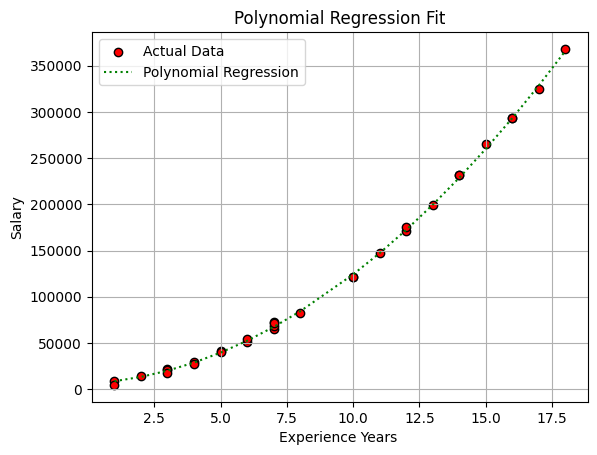

<Figure size 1000x700 with 0 Axes>

In [ ]:
X_sorted = np.sort(X, axis=0)
Y_poly_pred = model.predict(poly.transform(X_sorted))

# Plot data points and regression curve

plt.scatter(X, Y, color='red', edgecolors='k', label='Actual Data')
plt.plot(X_sorted, Y_poly_pred, color='green', linestyle='dotted', label='Polynomial Regression')
plt.xlabel('Experience Years ')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(True)
plt.figure(figsize=(10, 7))
plt.show()
